필요한 모듈 불러오기
- `pandas`, `numpy`, `matplotlib.pyplot`, (`sklearn`)
- warning 제거

In [232]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from scipy import stats

plt.rc('font', family='Malgun Gothic')
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

## 프로젝트 개요 (Project 1, 2, 3)
- 데이터의 주제, 데이터가 설명하고 있는 항목, 특징
- 기존 Super AI 프로젝트에는 없는 부분: *문제 정의하기* 부분을 둘로 나누기
    - 데이터에 대한 전반적인 설명 (Project 1, 2, 3)
    - 데이터를 분석, 활용하여 풀어갈 문제 제시 (문제 정의)
- 이미지, 사진 첨부

## 문제 정의
- 문제를 제기하게 된 배경
- 데이터 분석을 통해 해결할 수 있을 만한 3~4가지 정도의 문제 정의

## 데이터 수집 1, 2
- 객관식 : *데이터를 수집하는 방법으로 가장 알맞지 않은 것은?*
- Drag & Drop : 
    - 데이터를 보고 각 문제마다 어떤 특성들을 사용해야 하는지 고르기
    - 문제 해결에 사용할 만한 데이터 고르기

## 데이터 전처리 1, 2
- 결측값 확인, 처리 : 대체? 삭제? 대체한다면 0 / 평균값?
- 이상값 확인, 처리 :
    - Incomplete, Wrong : 올바르게 고치기 (D&D)
    - Redundant : 반복된 데이터 찾아서 삭제 (D&D)
- 이외의 정의된 문제와 관계없는 데이터 처리

## EDA 1, 2, 3, 4
문제 정의 부분의 문제 순차적으로 하나씩 풀어가기 
- 막대 or 누적 막대 그래프, 원, 꺾은선, 산점도, 박스 그래프 최대한 활용 : 데이터별로 활용할만한 그래프 종류가 다르니 여러가지 실험해보고 결정
---

## 따릉이

### 개요
최근 서울시 자전거 무료 대여 시스템인 따릉이를 찾는 사람들이 많아졌습니다.
그동안 수집한 따릉이 데이터는 시간별 대여 횟수뿐만 아니라 기온, 비가 왔는지 여부 등의 특성도 나타내고 있습니다.

이에 따라 언제 사람들이 따릉이를 많이 대여하는지 분석해보려고 합니다.
또한 데이터 분석 결과에 따라 특정 상황에 따릉이가 얼만큼 대여될지 예측해 봅시다.

### 문제 정의
- 따릉이 대여횟수가 가장 높은 시간대는 어느 시간대일까? (막대 / 꺾은선)
    - 시간대별 따릉이 대여횟수 시각화 (박스)
    - 시간대별 평균값 구하기
- 기온은 따릉이 대여횟수에 높은 영향을 끼칠까? (꺾은선 / 산점도)
- 정말 비가 오면 사람들이 따릉이를 적게 대여할까? (막대 / 원)
- 비가 오는 아침 8시의 따릉이 대여횟수 예측하기 (산점도: label로 구분하여 비가 올 때와 안 올 떄 구분, 시간대별 평균값 사용 X - 원본 데이터 사용)

### 데이터 수집 1 - 공공데이터 포털 (csv 파일)
- 필요할 것 같은 항목과 필요없어도 될 것 같은 항목 구분하기 (O/X)

### 데이터 수집 2 - 직접 자료 조사 (표)
- 데이터 수집 1에서 구분한 항목 표에 알맞게 옮기기 (D&D)

In [233]:
df = pd.read_csv("./bike/train.csv")

### 데이터 전처리 1 - 필요없는 항목 제거
- 수집한 전체 데이터셋 보여주고 필요없는 항목 체크하기, 열 이름 바꾸기

In [247]:
bike = df.drop(["hour_bef_windspeed", "hour_bef_humidity", "hour_bef_visibility", "hour_bef_ozone", "hour_bef_pm10", "hour_bef_pm2.5"], axis=1)
bike.columns = ["id", "hour", "temperature", "precipitation", "count"]
bike.tail()

,id,hour,temperature,precipitation,count
1454,2174,4,16.8,0.0,21
1455,2175,3,10.8,0.0,20
1456,2176,5,18.3,0.0,22
1457,2178,21,20.7,0.0,216
1458,2179,17,21.1,0.0,170


### 데이터 전처리 2 - 결측값 확인, 처리
- 데이터 첫 10행 제공 : 알맞는 내용으로 추가하여 표 완성하기 (D&D)

In [235]:
# temperature, precipitation 각 2개
bike.dropna(inplace=True) # 행 삭제

print(bike.shape)
bike.isna().sum()

(1457, 5)


id               0
hour             0
temperature      0
precipitation    0
count            0
dtype: int64

### 데이터 전처리 3 - 이상값 확인, 처리
- 데이터 끝 10행 제공 : 미완성, 잘못된 데이터 올바르게 수정 (중복 선다형)

In [236]:
# too complex

### EDA 1
- 시간대별 따릉이 평균 대여횟수 나타내기 : 표로 평균값 제공 → 알맞지 않은 그래프 선택해보기 (선다형)

<AxesSubplot: title={'center': '시간대별 따릉이 평균 대여횟수'}, xlabel='시간', ylabel='평균 대여횟수'>

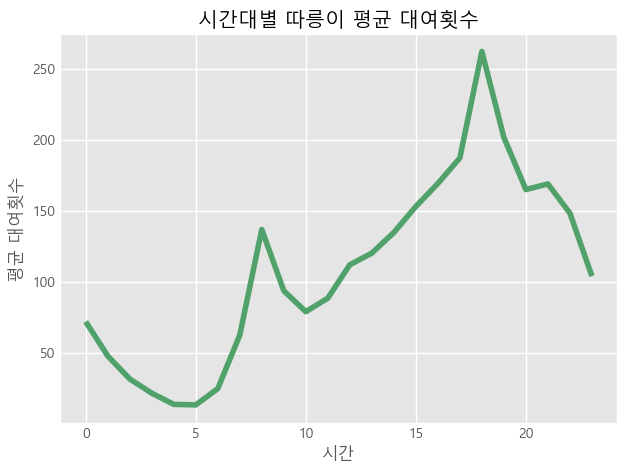

In [255]:
avgs = bike.groupby(["hour"])['count'].mean()

# 꺾은선
plt.title("시간대별 따릉이 평균 대여횟수")
avgs.plot(xlabel="시간", ylabel="평균 대여횟수", color='#51a26a')

[Text(0.5, 0, '시간'), Text(0, 0.5, '평균 대여횟수')]

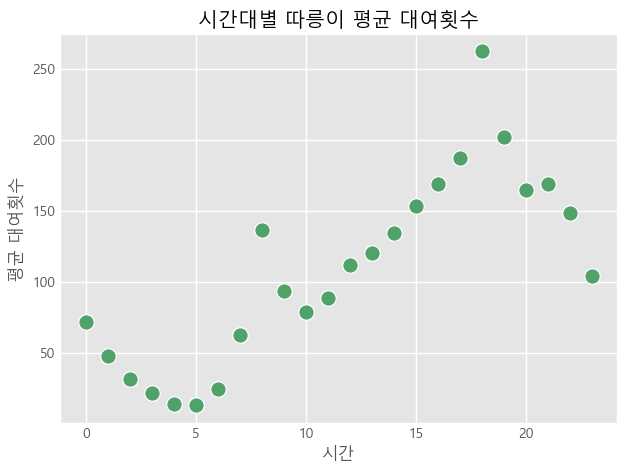

In [300]:
plt.title("시간대별 따릉이 평균 대여횟수")

# avgs.plot(kind="bar", xlabel="시간", ylabel="평균 대여횟수", color="#51a26a")
scatter = sns.scatterplot(data = avgs, color="#51a26a", s = 125)
scatter.set(xlabel = "시간", ylabel = "평균 대여횟수")

<AxesSubplot: title={'center': '시간대별 따릉이 평균 대여횟수'}, xlabel='시간', ylabel='평균 대여횟수'>

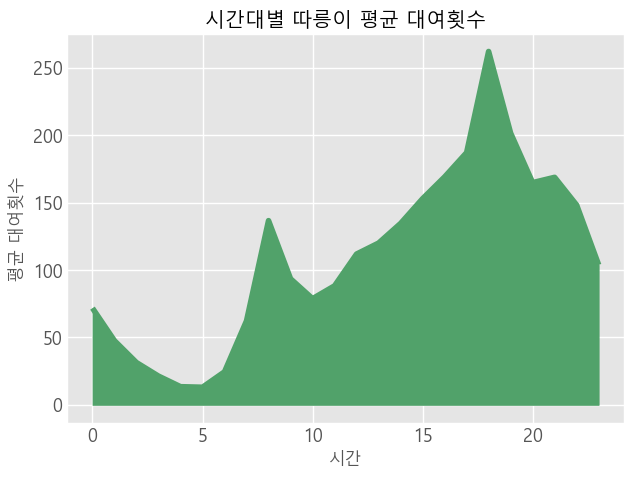

In [257]:
plt.title("시간대별 따릉이 평균 대여횟수")

avgs.plot(kind="area", xlabel="시간", ylabel="평균 대여횟수", fontsize=13, color="#51a26a")

<AxesSubplot: title={'center': '시간대별 따릉이 평균 대여횟수'}, ylabel='시간'>

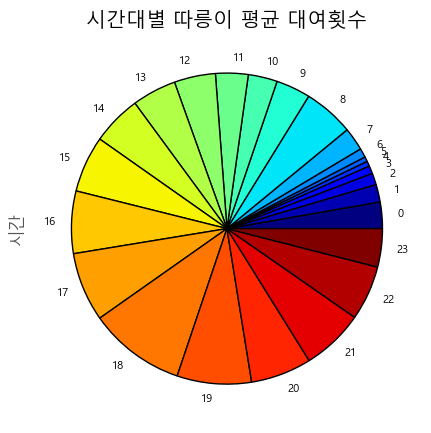

In [285]:
plt.title("시간대별 따릉이 평균 대여횟수")
avgs.plot(kind="pie", ylabel="시간", fontsize=8, colormap="jet", wedgeprops={"edgecolor":"k", "linewidth":1, 'antialiased': True})

### EDA 2
- 시간대별 따릉이 대여횟수 그대로 시각화 (박스 그래프) : 빈칸 채워서 문자 완성하기

<AxesSubplot: xlabel='hour', ylabel='count'>

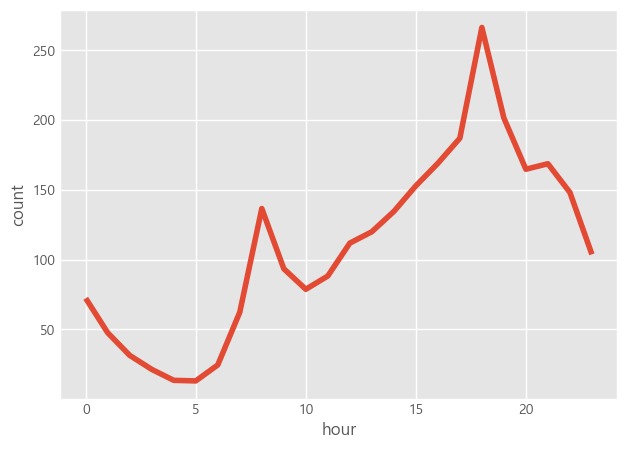

In [241]:
mean = pd.DataFrame(avgs)
sns.lineplot(x = 'hour', y = 'count', data = mean)

### EDA 3
- temperature vs. count 시각화 

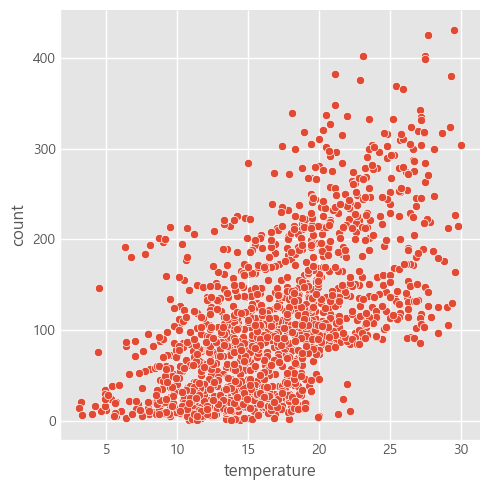

In [242]:
sns.relplot(x = "temperature", y = "count", data = bike)

### EDA 4
- precipitation vs. count 시각화

<AxesSubplot: xlabel='hour', ylabel='count'>

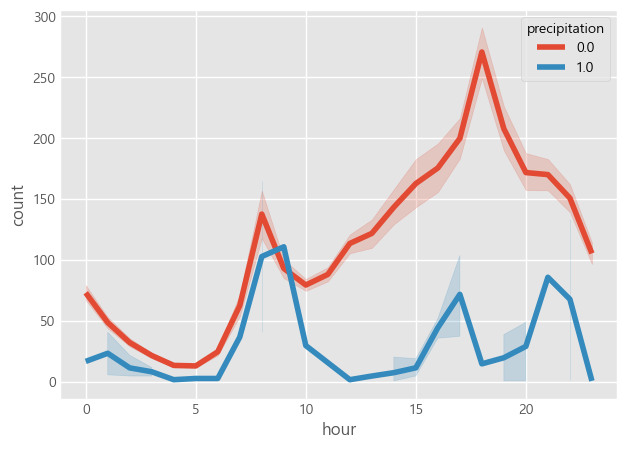

In [243]:
sns.lineplot(x = "hour", y = "count", data = bike, hue = "precipitation")

### EDA 5
- 오전 8시, 비 올 때 대여횟수 예측 : 그래프 사용

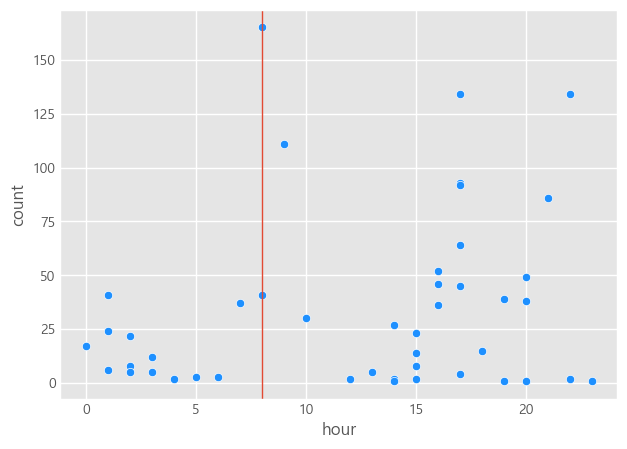

In [244]:
rain = bike[bike["precipitation"] == 1]
rain.head()
sns.scatterplot(data = rain, x = "hour", y = "count", c = 'dodgerblue')
plt.axvline(8, linewidth=1)